In [1]:
#Imports
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
import spacy

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.chunk import RegexpParser


In [2]:
# Downloads
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Todor\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Todor\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Todor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Todor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

# Agenda

1. Load the text file
2. Lowercasing the text
3. Removing special characters, numbers, and punctuation
4. Tokenization (splitting text into words or sentences)
- with NLTK
- with SpaCy
5. Part-of-Speech Tagging (POS)
- with NLTK
- with SpaCy
6. Chunking
7. Named Entity Recognition (NER)
8. Named Entity Recognition (NER) frequency analysis

#### 1. Load the text file

In [3]:
with open("Rammstein.txt", "r", encoding="utf-8") as file:
    text = file.read()

In [4]:
print(text[:500])

Rammstein (German pronunciation: [ˈʁamʃtaɪn], lit. "ramming stone") is a German Neue Deutsche Härte band formed in Berlin in 1994. The band's lineup—consisting of lead vocalist Till Lindemann, lead guitarist Richard Kruspe, rhythm guitarist Paul Landers, bassist Oliver Riedel, drummer Christoph Schneider, and keyboardist Christian "Flake" Lorenz—has remained unchanged throughout their history, along with their approach to songwriting, which consists of Lindemann writing and singing the lyrics ov


#### 2. Lowercasing the text


In [5]:
lowercase_text = text.lower()
print(lowercase_text[:500])

rammstein (german pronunciation: [ˈʁamʃtaɪn], lit. "ramming stone") is a german neue deutsche härte band formed in berlin in 1994. the band's lineup—consisting of lead vocalist till lindemann, lead guitarist richard kruspe, rhythm guitarist paul landers, bassist oliver riedel, drummer christoph schneider, and keyboardist christian "flake" lorenz—has remained unchanged throughout their history, along with their approach to songwriting, which consists of lindemann writing and singing the lyrics ov


#### 3. Removing special characters, numbers, and punctuation


In [6]:
cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", lowercase_text)
print(cleaned_text[:500])

rammstein german pronunciation amtan lit ramming stone is a german neue deutsche hrte band formed in berlin in 1994 the bands lineupconsisting of lead vocalist till lindemann lead guitarist richard kruspe rhythm guitarist paul landers bassist oliver riedel drummer christoph schneider and keyboardist christian flake lorenzhas remained unchanged throughout their history along with their approach to songwriting which consists of lindemann writing and singing the lyrics over instrumental pieces the 


#### 4. Tokenization (splitting text into words and sentences)

##### - NLTK

In [7]:
# word tokenization
word_tokens_nltk = word_tokenize(cleaned_text)
print(word_tokens_nltk[:50])

['rammstein', 'german', 'pronunciation', 'amtan', 'lit', 'ramming', 'stone', 'is', 'a', 'german', 'neue', 'deutsche', 'hrte', 'band', 'formed', 'in', 'berlin', 'in', '1994', 'the', 'bands', 'lineupconsisting', 'of', 'lead', 'vocalist', 'till', 'lindemann', 'lead', 'guitarist', 'richard', 'kruspe', 'rhythm', 'guitarist', 'paul', 'landers', 'bassist', 'oliver', 'riedel', 'drummer', 'christoph', 'schneider', 'and', 'keyboardist', 'christian', 'flake', 'lorenzhas', 'remained', 'unchanged', 'throughout', 'their']


In [8]:
# sentence tokenization
sent_tokens_nltk = sent_tokenize(cleaned_text)
print(sent_tokens_nltk)

['rammstein german pronunciation amtan lit ramming stone is a german neue deutsche hrte band formed in berlin in 1994 the bands lineupconsisting of lead vocalist till lindemann lead guitarist richard kruspe rhythm guitarist paul landers bassist oliver riedel drummer christoph schneider and keyboardist christian flake lorenzhas remained unchanged throughout their history along with their approach to songwriting which consists of lindemann writing and singing the lyrics over instrumental pieces the rest of the band has completed beforehand prior to their formation some members were associated with the punk rock acts feeling b and first arsch\n\nafter winning a local contest rammstein was able to record demos and send them to different record labels eventually signing with motor music working with producer jacob hellner they released their debut album herzeleid in 1995 though the album initially sold poorly the band gained popularity through their live performances and the album eventuall

##### - SpaCy

In [9]:
# Model Initialization
nlp = spacy.load("en_core_web_sm")
doc = nlp(cleaned_text)

In [10]:
# word tokenization
word_tokens_spacy = [token.text for token in doc]
print(word_tokens_spacy)

['rammstein', 'german', 'pronunciation', 'amtan', 'lit', 'ramming', 'stone', 'is', 'a', 'german', 'neue', 'deutsche', 'hrte', 'band', 'formed', 'in', 'berlin', 'in', '1994', 'the', 'bands', 'lineupconsisting', 'of', 'lead', 'vocalist', 'till', 'lindemann', 'lead', 'guitarist', 'richard', 'kruspe', 'rhythm', 'guitarist', 'paul', 'landers', 'bassist', 'oliver', 'riedel', 'drummer', 'christoph', 'schneider', 'and', 'keyboardist', 'christian', 'flake', 'lorenzhas', 'remained', 'unchanged', 'throughout', 'their', 'history', 'along', 'with', 'their', 'approach', 'to', 'songwriting', 'which', 'consists', 'of', 'lindemann', 'writing', 'and', 'singing', 'the', 'lyrics', 'over', 'instrumental', 'pieces', 'the', 'rest', 'of', 'the', 'band', 'has', 'completed', 'beforehand', 'prior', 'to', 'their', 'formation', 'some', 'members', 'were', 'associated', 'with', 'the', 'punk', 'rock', 'acts', 'feeling', 'b', 'and', 'first', 'arsch', '\n\n', 'after', 'winning', 'a', 'local', 'contest', 'rammstein', 'w

In [11]:
# sentence tokenization
sent_tokens_spacy = [sent.text for sent in doc.sents]
print(sent_tokens_spacy)

['rammstein german pronunciation amtan lit ramming stone is a german neue deutsche hrte band formed in berlin in 1994 the bands lineupconsisting of lead vocalist till lindemann lead guitarist richard kruspe rhythm guitarist paul landers bassist oliver riedel drummer christoph schneider and keyboardist christian flake lorenzhas remained unchanged throughout their history along with their approach to songwriting which consists of lindemann writing and singing the lyrics over instrumental pieces the rest of the band has completed beforehand prior to their formation some members were associated with the punk rock acts feeling b and first arsch\n\nafter winning a local contest rammstein was able to record demos and send them to different record labels eventually signing with motor music working with producer jacob hellner they released their debut album herzeleid in 1995 though the album initially sold poorly the band gained popularity through their live performances and the album eventuall

#### 5.Part-of-Speech Tagging (POS)

##### - with NLTK

In [16]:
pos_tags = nltk.pos_tag(word_tokens_nltk)
print(pos_tags[:50])

[('rammstein', 'JJ'), ('german', 'JJ'), ('pronunciation', 'NN'), ('amtan', 'NN'), ('lit', 'NN'), ('ramming', 'VBG'), ('stone', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('german', 'JJ'), ('neue', 'NN'), ('deutsche', 'NN'), ('hrte', 'NN'), ('band', 'NN'), ('formed', 'VBN'), ('in', 'IN'), ('berlin', 'NN'), ('in', 'IN'), ('1994', 'CD'), ('the', 'DT'), ('bands', 'NNS'), ('lineupconsisting', 'NN'), ('of', 'IN'), ('lead', 'JJ'), ('vocalist', 'NN'), ('till', 'NN'), ('lindemann', 'JJ'), ('lead', 'JJ'), ('guitarist', 'NN'), ('richard', 'NN'), ('kruspe', 'NN'), ('rhythm', 'JJ'), ('guitarist', 'NN'), ('paul', 'NN'), ('landers', 'NNS'), ('bassist', 'VBP'), ('oliver', 'IN'), ('riedel', 'NN'), ('drummer', 'NN'), ('christoph', 'NN'), ('schneider', 'NN'), ('and', 'CC'), ('keyboardist', 'NN'), ('christian', 'JJ'), ('flake', 'NN'), ('lorenzhas', 'NN'), ('remained', 'VBD'), ('unchanged', 'JJ'), ('throughout', 'IN'), ('their', 'PRP$')]


In [17]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

##### - with SpaCy

In [18]:
pos_tags_spacy = [(token.text, token.pos_) for token in doc]
print(pos_tags_spacy)

[('rammstein', 'PROPN'), ('german', 'ADJ'), ('pronunciation', 'NOUN'), ('amtan', 'PROPN'), ('lit', 'VERB'), ('ramming', 'VERB'), ('stone', 'NOUN'), ('is', 'AUX'), ('a', 'DET'), ('german', 'ADJ'), ('neue', 'NOUN'), ('deutsche', 'NOUN'), ('hrte', 'PROPN'), ('band', 'NOUN'), ('formed', 'VERB'), ('in', 'ADP'), ('berlin', 'PROPN'), ('in', 'ADP'), ('1994', 'NUM'), ('the', 'DET'), ('bands', 'NOUN'), ('lineupconsisting', 'NOUN'), ('of', 'ADP'), ('lead', 'ADJ'), ('vocalist', 'NOUN'), ('till', 'SCONJ'), ('lindemann', 'PROPN'), ('lead', 'PROPN'), ('guitarist', 'PROPN'), ('richard', 'PROPN'), ('kruspe', 'PROPN'), ('rhythm', 'PROPN'), ('guitarist', 'PROPN'), ('paul', 'PROPN'), ('landers', 'PROPN'), ('bassist', 'PROPN'), ('oliver', 'PROPN'), ('riedel', 'PROPN'), ('drummer', 'PROPN'), ('christoph', 'PROPN'), ('schneider', 'NOUN'), ('and', 'CCONJ'), ('keyboardist', 'ADJ'), ('christian', 'PROPN'), ('flake', 'PROPN'), ('lorenzhas', 'PROPN'), ('remained', 'VERB'), ('unchanged', 'ADJ'), ('throughout', 'AD

| **Tag**  | **Meaning**                  | **Example**           |
|----------|------------------------------|-----------------------|
| **ADJ**  | Adjective                    | big, amazing, green   |
| **ADP**  | Adposition                   | in, on, over          |
| **ADV**  | Adverb                       | quickly, silently     |
| **AUX**  | Auxiliary verb               | is, have (as helper)  |
| **CCONJ**| Coordinating conjunction     | and, but, or          |
| **DET**  | Determiner                   | the, a, an            |
| **INTJ** | Interjection                 | oh, wow, uh           |
| **NOUN** | Noun                         | dog, house, idea      |
| **PROPN**| Proper noun                  | John, London, Google  |
| **NUM**  | Numeral                      | one, two, 3           |
| **PART** | Particle                     | to (to fly), not      |
| **PRON** | Pronoun                      | I, you, he, she       |
| **PUNCT**| Punctuation                  | ., ?, !               |
| **SCONJ**| Subordinating conjunction    | because, that, if     |
| **SYM**  | Symbol                       | $, %, &, +            |
| **VERB** | Verb                         | run, eat, be          |
| **X**    | Other                        | for foreign words     |


#### 6. Chunking

In [19]:
# Initializing the rules
grammar = """
    NP: {<DT>?<JJ>*<NN>}
    VP: {<VB.*><NP|PP|CLAUSE>+$}
    PP: {<IN><NP>}
    CLAUSE:{<NP><VP>}
    """

In [23]:
#Chunking with RegexpParser
chunk_parser = RegexpParser(grammar)
chunks = chunk_parser.parse(pos_tags_spacy)
print(chunks)

(S
  rammstein/PROPN
  german/ADJ
  pronunciation/NOUN
  amtan/PROPN
  lit/VERB
  ramming/VERB
  stone/NOUN
  is/AUX
  a/DET
  german/ADJ
  neue/NOUN
  deutsche/NOUN
  hrte/PROPN
  band/NOUN
  formed/VERB
  in/ADP
  berlin/PROPN
  in/ADP
  1994/NUM
  the/DET
  bands/NOUN
  lineupconsisting/NOUN
  of/ADP
  lead/ADJ
  vocalist/NOUN
  till/SCONJ
  lindemann/PROPN
  lead/PROPN
  guitarist/PROPN
  richard/PROPN
  kruspe/PROPN
  rhythm/PROPN
  guitarist/PROPN
  paul/PROPN
  landers/PROPN
  bassist/PROPN
  oliver/PROPN
  riedel/PROPN
  drummer/PROPN
  christoph/PROPN
  schneider/NOUN
  and/CCONJ
  keyboardist/ADJ
  christian/PROPN
  flake/PROPN
  lorenzhas/PROPN
  remained/VERB
  unchanged/ADJ
  throughout/ADP
  their/PRON
  history/NOUN
  along/ADP
  with/ADP
  their/PRON
  approach/NOUN
  to/ADP
  songwriting/NOUN
  which/PRON
  consists/VERB
  of/ADP
  lindemann/PROPN
  writing/NOUN
  and/CCONJ
  singing/VERB
  the/DET
  lyrics/NOUN
  over/ADP
  instrumental/ADJ
  pieces/NOUN
  the/DET
  r

#### 7. Named Entity Recognition (NER)

##### - with NLTK

In [38]:
named_entities = nltk.ne_chunk(pos_tags)
print(named_entities)

(S
  rammstein/JJ
  german/JJ
  pronunciation/NN
  amtan/NN
  lit/NN
  ramming/VBG
  stone/NN
  is/VBZ
  a/DT
  german/JJ
  neue/NN
  deutsche/NN
  hrte/NN
  band/NN
  formed/VBN
  in/IN
  berlin/NN
  in/IN
  1994/CD
  the/DT
  bands/NNS
  lineupconsisting/NN
  of/IN
  lead/JJ
  vocalist/NN
  till/NN
  lindemann/JJ
  lead/JJ
  guitarist/NN
  richard/NN
  kruspe/NN
  rhythm/JJ
  guitarist/NN
  paul/NN
  landers/NNS
  bassist/VBP
  oliver/IN
  riedel/NN
  drummer/NN
  christoph/NN
  schneider/NN
  and/CC
  keyboardist/NN
  christian/JJ
  flake/NN
  lorenzhas/NN
  remained/VBD
  unchanged/JJ
  throughout/IN
  their/PRP$
  history/NN
  along/IN
  with/IN
  their/PRP$
  approach/NN
  to/TO
  songwriting/VBG
  which/WDT
  consists/VBZ
  of/IN
  lindemann/NN
  writing/NN
  and/CC
  singing/VBG
  the/DT
  lyrics/NNS
  over/IN
  instrumental/JJ
  pieces/NNS
  the/DT
  rest/NN
  of/IN
  the/DT
  band/NN
  has/VBZ
  completed/VBN
  beforehand/RB
  prior/RB
  to/TO
  their/PRP$
  formation/NN
  so

##### - with SpaCy

In [26]:
for ent in doc.ents:
    print(ent.text, ent.label_)

rammstein german PERSON
german NORP
berlin GPE
1994 DATE
lindemann PERSON
richard kruspe PERSON
paul PERSON
christian NORP
lindemann ORG
first ORDINAL
jacob hellner PERSON
1995 DATE
germany GPE
second ORDINAL
1997 DATE
germany GPE
nearly four years DATE
aus berlin 1999 ORG
2001 six DATE
europe LOC
germany GPE
2004 DATE
two CARDINAL
germany GPE
mein teil PERSON
spain GPE
first ORDINAL
fifth ORDINAL
2005 DATE
germany GPE
second ORDINAL
2006 DATE
sixth ORDINAL
alle da PERSON
2009 DATE
first ORDINAL
germany GPE
several years DATE
germany GPE
paris GPE
a decade DATE
2019 DATE
second ORDINAL
germany GPE
seventh ORDINAL
may 2019 DATE
14 CARDINAL
eighth ORDINAL
april 2022 DATE
first ORDINAL
ich tu dir weh PERSON
germany GPE
19891996 DATE
2001 DATE
1989 DATE
german NORP
richard kruspe PERSON
west berlin GPE
the berlin wall FAC
first ORDINAL
first ORDINAL
first ORDINAL
1992 DATE
first ORDINAL
the united states GPE
lindemann PERSON
german NORP
1993 DATE
lindemann PERSON
about a year and a half DA

#### 8. Named Entity Recognition (NER) frequency analysis

In [42]:
# Creating a list with the entities
entities = [ent.label_ for ent in doc.ents]
print(entities[:20])

['PERSON', 'NORP', 'GPE', 'DATE', 'PERSON', 'PERSON', 'PERSON', 'NORP', 'ORG', 'ORDINAL', 'PERSON', 'DATE', 'GPE', 'ORDINAL', 'DATE', 'GPE', 'DATE', 'ORG', 'DATE', 'LOC']


In [45]:
# Counting the frequencies
entity_freq = Counter(entities)
print(entity_freq)

Counter({'DATE': 273, 'GPE': 139, 'PERSON': 134, 'NORP': 88, 'CARDINAL': 74, 'ORDINAL': 68, 'ORG': 30, 'LOC': 22, 'FAC': 9, 'LANGUAGE': 8, 'TIME': 5, 'QUANTITY': 3, 'PRODUCT': 3, 'EVENT': 1, 'MONEY': 1})


In [65]:
sorted_entity_freq = sorted(entity_freq.items(), key=lambda x:x[1], reverse = True)

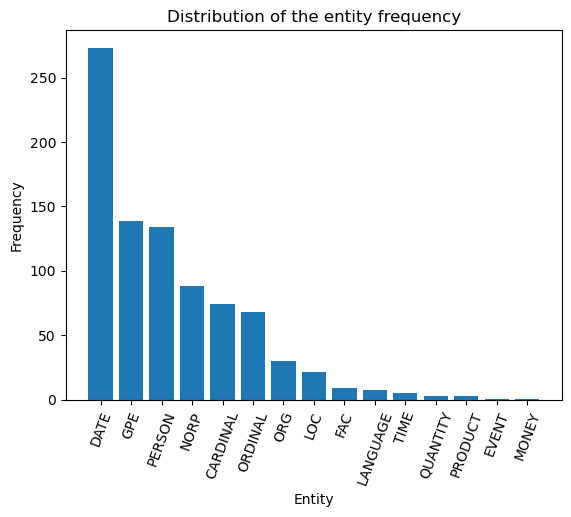

In [66]:
plt.bar(*zip(*sorted_entity_freq))

plt.xticks(rotation=70)
plt.xlabel("Entity")
plt.ylabel("Frequency")
plt.title("Distribution of the entity frequency")

plt.show()